In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Canada.csv")

In [3]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


1) Over the number of immigrants to Canada over all-time, which countries have contributed most towards this total immigration?

In [4]:
df.groupby(df["Country"])["Total"].value_counts()

Country         Total
Afghanistan     58639    1
Albania         15699    1
Algeria         69439    1
American Samoa  6        1
Andorra         15       1
                        ..
Viet Nam        97146    1
Western Sahara  2        1
Yemen           2985     1
Zambia          1677     1
Zimbabwe        8598     1
Name: count, Length: 195, dtype: int64

In [5]:
count_df = df.groupby(df["Country"])[["Country","Total"]]

In [6]:
count_df.head()

,Country,Total
0,Afghanistan,58639
1,Albania,15699
2,Algeria,69439
3,American Samoa,6
4,Andorra,15
...,...,...
190,Viet Nam,97146
191,Western Sahara,2
192,Yemen,2985
193,Zambia,1677


In [7]:
import matplotlib.pyplot as plt

In [16]:
country = df.groupby("Country")[["Total"]]

In [26]:
top_countries = country.mean().sort_values(by="Total",ascending=False).head(10)

<Figure size 1000x800 with 0 Axes>

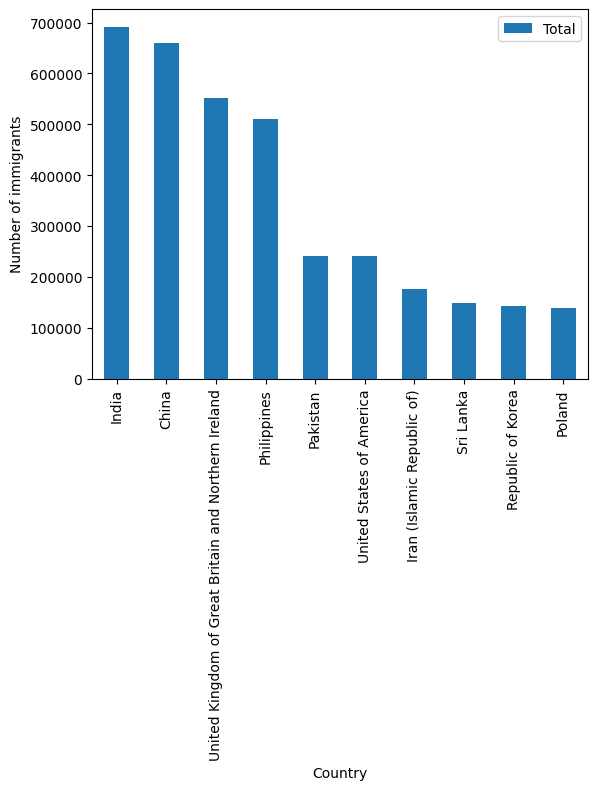

In [29]:
plt.figure(figsize=(10,8))
top_countries.plot.bar()
plt.xlabel("Country")
plt.ylabel("Number of immigrants")
plt.show()

In [32]:
from wordcloud import WordCloud

In [121]:
df[df["Country"] == "India"]["Total"]

79    691904
Name: Total, dtype: int64


In [72]:
text = []

In [88]:
count_df.head()

,Country,Total
0,Afghanistan,58639
1,Albania,15699
2,Algeria,69439
3,American Samoa,6
4,Andorra,15
...,...,...
190,Viet Nam,97146
191,Western Sahara,2
192,Yemen,2985
193,Zambia,1677


In [125]:
for each in df.Country:
    Count = df[df["Country"] == each]["Total"]
    
    text.append(each)

joined = " ".join(text)

In [86]:
wordcloud = WordCloud().generate(joined)

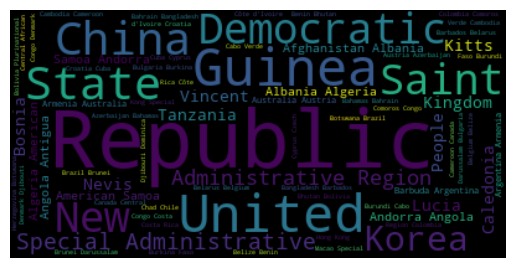

In [87]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

2) Across the decades how has the contribution of each continent changed over time?

In [33]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [57]:
con_cou = df.groupby(df["Continent"])[["Country","Continent"]].value_counts()


In [59]:
df["Country"]

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [62]:
pd.crosstab(df["Total"],[df["Continent"],df["Country"]])

Continent  Africa                                                        \
Country   Algeria Angola Benin Botswana Burkina Faso Burundi Cabo Verde   
Total                                                                     
1               0      0     0        0            0       0          0   
2               0      0     0        0            0       0          0   
5               0      0     0        0            0       0          0   
6               0      0     0        0            0       0          0   
8               0      0     0        0            0       0          0   
...           ...    ...   ...      ...          ...     ...        ...   
241600          0      0     0        0            0       0          0   
511391          0      0     0        0            0       0          0   
551500          0      0     0        0            0       0          0   
659962          0      0     0        0            0       0          0   
691904          0      0     0        0            0       0          0   

Continent                                         ...          Oceania        \
Country   Cameroon Central African Republic Chad  ... Marshall Islands Nauru   
Total                                             ...                          
1                0                        0    0  ...                0     0   
2                0                        0    0  ...                1     0   
5                0                        0    0  ...                0     0   
6                0                        0    0  ...                0     0   
8                0                        0    0  ...                0     0   
...            ...                      ...  ...  ...              ...   ...   
241600           0                        0    0  ...                0     0   
511391           0                        0    0  ...                0     0   
551500           0                        0    0  ...                0     0   
659962           0                        0    0  ...                0     0   
691904           0                        0    0  ...                0     0   

Continent                                                                      \
Country   New Caledonia New Zealand Palau Papua New Guinea Samoa Tonga Tuvalu   
Total                                                                           
1                     0           0     1                0     0     0      0   
2                     0           0     0                0     0     0      0   
5                     1           0     0                0     0     0      0   
6                     0           0     0                0     0     0      0   
8                     0           0     0                0     0     0      1   
...                 ...         ...   ...              ...   ...   ...    ...   
241600                0           0     0                0     0     0      0   
511391                0           0     0                0     0     0      0   
551500                0           0     0                0     0     0      0   
659962                0           0     0                0     0     0      0   
691904                0           0     0                0     0     0      0   

Continent          
Country   Vanuatu  
Total              
1               0  
2               0  
5               0  
6               0  
8               0  
...           ...  
241600          0  
511391          0  
551500          0  
659962          0  
691904          0  

[190 rows x 195 columns]